In [1]:
import pandas as pd

In [2]:
icecream = pd.read_csv("https://okumuralab.org/~okumura/stat/data/icecream.csv", encoding="shift-jis", header=1)
weather = pd.read_csv("https://okumuralab.org/~okumura/stat/data/tokyo-weather-2003-2012.csv", encoding="shift-jis")

In [3]:
icecream

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
...,...,...,...
115,2012,8,1332
116,2012,9,849
117,2012,10,515
118,2012,11,326


In [4]:
weather

,年,月,日最高気温の平均(℃),降水量の合計(mm),平均湿度(％),日最高気温25℃以上日数(日)
0,2003,1,9.3,101.0,46,0
1,2003,2,9.9,53.5,52,0
2,2003,3,12.7,159.5,49,0
3,2003,4,19.2,121.0,61,3
4,2003,5,22.4,172.5,65,7
...,...,...,...,...,...,...
115,2012,8,33.1,25.0,69,31
116,2012,9,29.8,214.5,73,27
117,2012,10,23.0,154.5,65,9
118,2012,11,16.3,154.0,58,0


In [5]:
data = pd.merge(icecream, weather, on=["年", "月"])
data = data.rename(columns={"アイスクリーム": "アイスクリームの売り上げ (家庭の平均購入額)"})

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

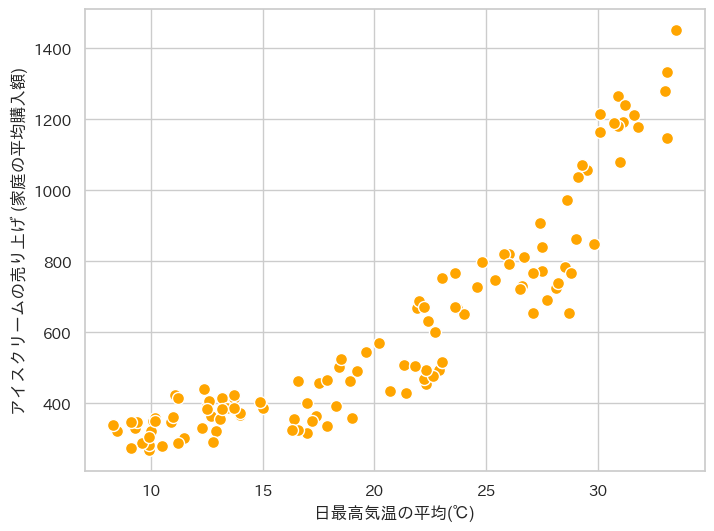

In [7]:
x_col = "日最高気温の平均(℃)"
y_col = "アイスクリームの売り上げ (家庭の平均購入額)"

sns.set_theme(style="whitegrid", palette="muted", font="IPAexGothic")

plt.figure(figsize=(8, 6))

plot_ice = lambda :sns.scatterplot(
    data=data, 
    x=x_col,
    y=y_col,
    s=75, 
    color='orange', 
    edgecolor='w', 
    linewidth=1, 
    marker='o',
)

plot_ice()

plt.savefig("../img/icecream_scatter.png")

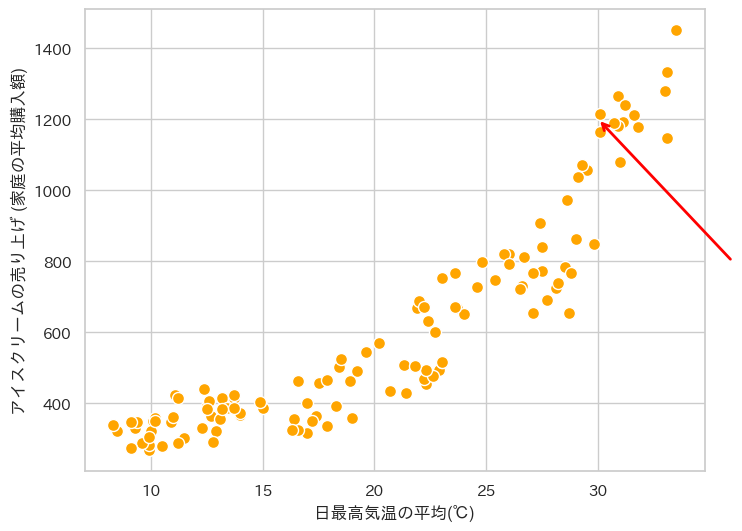

In [8]:
plt.figure(figsize=(8, 6))

plot_ice()

plt.annotate(
    "",
    xy=(30, 1200),
    xytext=(36, 800), 
    arrowprops=dict(arrowstyle="->", lw=2, color='red')
)

plt.savefig("../img/icecream_scatter_annotation.png")

In [9]:
from dataclasses import dataclass

@dataclass
class LinearRegressionModel:
    a: float
    b: float

    def __repr__(self):
        if self.b > 0:
            return f"y = {self.a}x + {self.b}"
        elif self.b == 0:
            return f"y = {self.a}x"
        else:
            return f"y = {self.a}x - {-self.b}"
        
    def __call__(self, x: float) -> float:
        return self.a * x + self.b
    
    def loss(self, x, y) -> float:
        return ((self(x) - y) ** 2).mean()


def plot_reg(m: LinearRegressionModel):
    plot_ice()
    x = data[x_col]
    y = m(x)
    plt.plot(x, y, label=str(m))
    plt.legend()
    

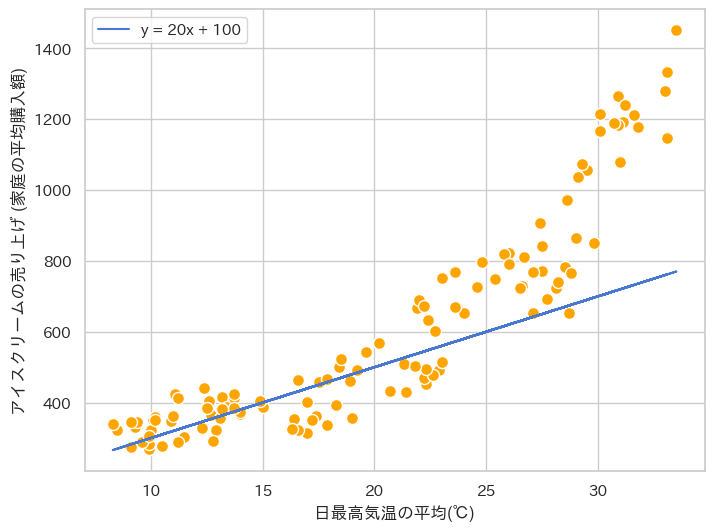

In [10]:
plt.figure(figsize=(8, 6))
plot_reg(LinearRegressionModel(20, 100))
plt.legend()
plt.savefig("../img/icecream_scatter_regression_20_100.png")

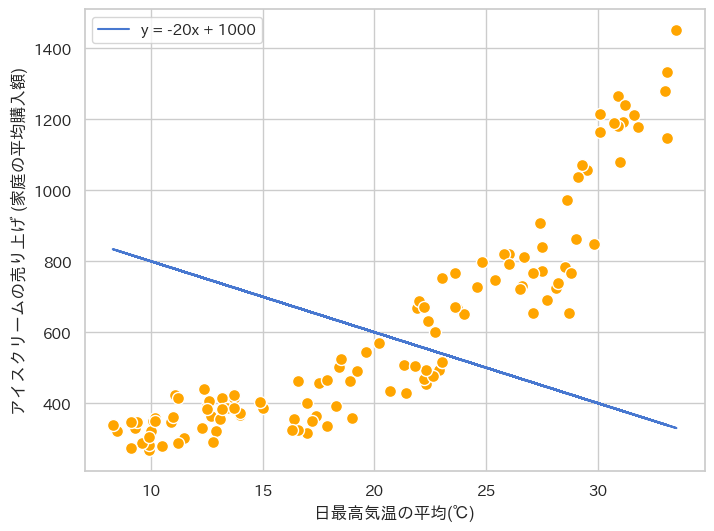

In [11]:
plt.figure(figsize=(8, 6))
plot_reg(LinearRegressionModel(-20, 1000))
plt.legend()
plt.savefig("../img/icecream_scatter_regression_-20_1000.png")

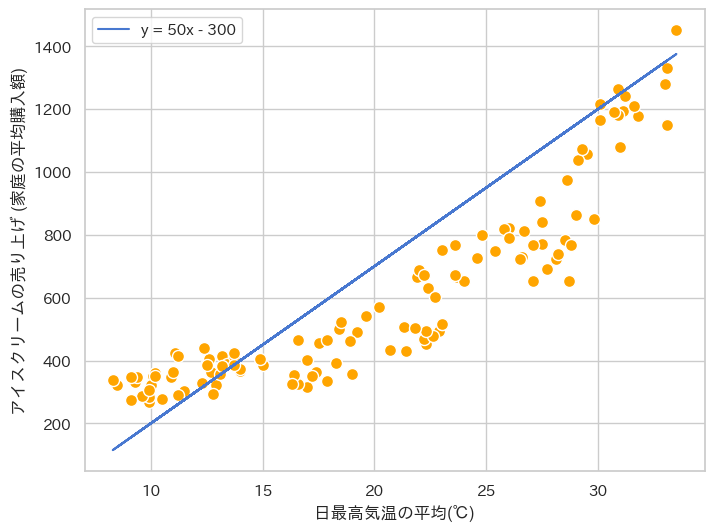

In [12]:
plt.figure(figsize=(8, 6))
plot_reg(LinearRegressionModel(50, -300))
plt.legend()
plt.savefig("../img/icecream_scatter_regression_50_-300.png")

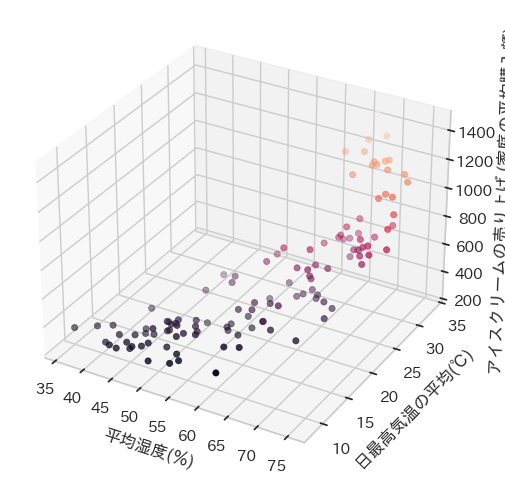

In [13]:
x = data["平均湿度(％)"]
y = data["日最高気温の平均(℃)"]
z = data["アイスクリームの売り上げ (家庭の平均購入額)"]

plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, linewidth=0.5)
ax.set_xlabel("平均湿度(％)")
ax.set_ylabel("日最高気温の平均(℃)")
ax.set_zlabel("アイスクリームの売り上げ (家庭の平均購入額)")

plt.savefig("../img/icecream_scatter_3d.png")


In [14]:
x = data["日最高気温の平均(℃)"]
y = data["アイスクリームの売り上げ (家庭の平均購入額)"]

LinearRegressionModel(20, 100).loss(x, y)

40268.55

In [15]:
x = data["日最高気温の平均(℃)"]
y = data["アイスクリームの売り上げ (家庭の平均購入額)"]

LinearRegressionModel(50, -300).loss(x, y)

39310.45

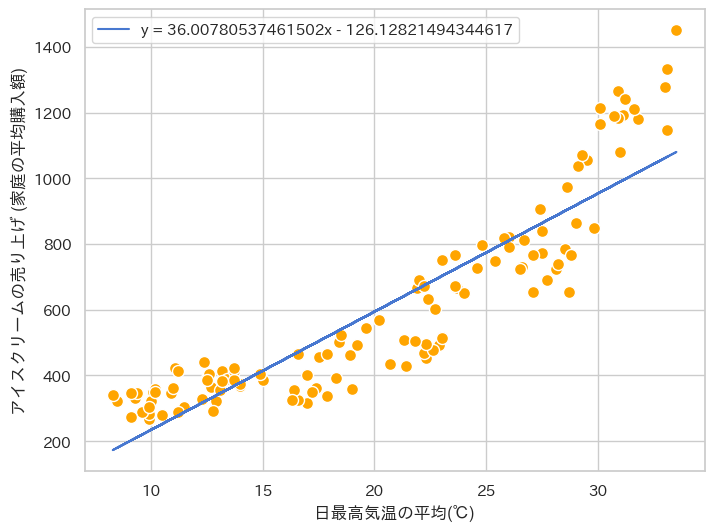

In [16]:
import numpy as np

def solve(x, y):
    a, b = np.polyfit(x, y, 1)
    return LinearRegressionModel(a, b)


m = solve(data["日最高気温の平均(℃)"], data["アイスクリームの売り上げ (家庭の平均購入額)"])

plt.figure(figsize=(8, 6))
plot_reg(m)
plt.legend()
plt.savefig("../img/icecream_scatter_regression.png")


In [17]:
m

y = 36.00780537461502x - 126.12821494344617